# Inflation historique aux Etats-Unis, et maintenant ?
### Alexandre Lohman **

Cette semaine, nous allons faire un voyage vers les États-Unis. L’indice des prix au consommateur a augmenté de 0.9% en Juin (variation mensuelle), portant le taux à 5.4% en glissement annuel - un résultat largement supérieur à celui espéré par les économistes (0.5% mensuel et 4.9% interannuel).

L’inflation annuelle a été portée par les prix de l’énergie (+24.5%) et des voitures d’occasion (+45.2%), ces deux hausses combinées représentant respectivement 27.51% et  21.11% de l’augmentation totale. Les défenseurs du caractère « transitoire » de l’inflation U.S oublient un peu vite que le taux d’inflation excluant l’énergie et les voitures d’occasion correspondait à 5.28% en variation annualisée en Juin.  


Et maintenant ? Il est probable que la hausse des matières premières continue d’être repassée dans les prix au consommateur tout au long de 2021 tandis que la situation de sècheresse intense dans l’ouest américain devrait limiter le ralentissement des prix de l’alimentation et de l’énergie. Fin 2021, le risque d’un nouvel événement climatique du type « la Niña»  (probabilité de 66% d’après la NOAA - agence nationale du climat américain) devrait, s’il se concrétisait, exercer une pression à la hausse sur les matières premières agricoles et sur le minerai de fer au moins au long des premiers mois de 2022. 

De plus, il est important de mentionner que, contrairement à l’Union européenne, le cout du logement représente aux USA une partie importante de l’IPC (31.37%). Dans un contexte de forte hausse des prix de l’immobilier, le logement devrait  être un support pour l’indice des prix au consommateur même une fois que le choc des matières premières sera terminé et participera d’un « effet de second tour » de l’inflation.

Jusqu’où l’inflation pourrait-elle aller simplement par effet d’inertie, sans inclure les risques cités ci-dessus ?   

En avril dernier, j’avais alerté sur le risque inflationniste aux Etats-Unis alors que l’enquête trimestrielle de la Federal Reserve (SPF-  Survey of Professional Forecasters) prévoyait une inflation de l’ordre de 2.2% en moyenne en 2021. De mon côté, j’estimais, avec un simple modèle autorégressif (ARIMA), un scénario moins optimiste que le consensus. Finalement, les données réelles se sont révélées pour le moment plus mauvaises que mon scénario le plus pessimiste calculé à partir d’une prévision naïve (stabilité de l’inflation jusqu’à la fin de l’année). (Graphique 1 – Prévision 1 « ARIMA » : scénario optimiste, Prévision 2 « naïve » : scénario pessimiste).


![Graphique 1](https://github.com/anapaulatf/alex/blob/master/Figure_1.png?raw=true)

Il était grand temps de mettre ces prévisions à jour. En utilisant une nouvelle fois un modèle ARIMA sur les données non ajustées, j’obtiens une inflation mensuelle moyenne de l’ordre de 0.247% sur la période 2021m07-2022 (un chiffre loin d’être extravagant). Dans un tel scénario (conservateur) l’inflation devrait ralentir à partir du mois de Juillet à cause de l’effet de base lié à l’augmentation des prix à la fin de la première vague (un mouvement similaire a été constaté sur l’inflation européenne).

Néanmoins ce ralentissement sera de courte durée et nous devrions assister à une nouvelle accélération de l’IPC au plus tard partir du mois de Septembre pour terminer l’année à 5.83% (Graphique 2). Il est bon de rappeler que le modèle ARIMA donne la tendance générale d’une série temporelle et peut servir à estimer l’inertie de l’inflation, mais ne saurait être interprété comme une prévision précise des taux d’inflation mensuels (même si ces modèles sont parfois meilleurs que les modèles structurels concernant les prévisions de court terme). Mon sentiment est que le « scénario ARIMA » doit être qualifié « d’optimiste » vu les pressions actuelles dans l’économie, la forte hausse des prix du pétrole, les sècheresses dramatiques et la hausse des prix de l’alimentation qui devrait en découler. Néanmoins ce résultat est encore supérieur aux prévisions des analystes dans la dernière enquête de la Federal Reserve (moyenne annuelle de 3%).

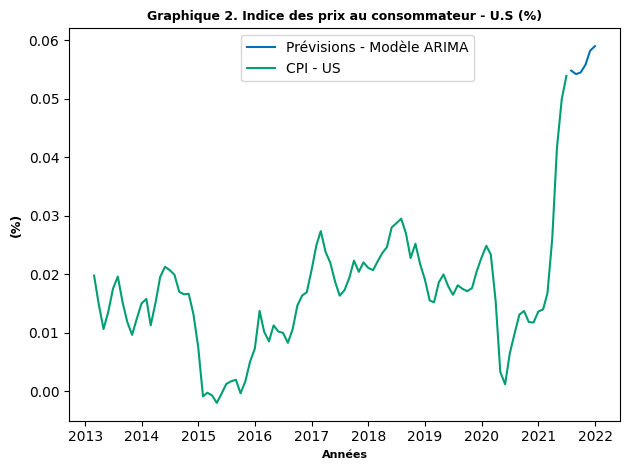

In [4]:
import numpy as np
import pmdarima as pm
import quandl
import pandas as pd
import matplotlib.pyplot as plt
mydata = quandl.get("FRED/CPIAUCNS", returns="numpy",authtoken="b2P8ovo7y75geHc7vMq_",  start_date="2012-02-01", transform="rdiff")

index = pd.date_range("2012-03-31", "2021-06-30", freq="M")
df = pd.DataFrame(mydata, index=index)
df.drop("Date", inplace=True, axis=1)
index = pd.date_range("2021-07-30", "2021-06-30", freq="M")

arima = pm.auto_arima(df)
forecast, conf_int =arima.predict(n_periods=6,return_conf_int=True)

index2 = pd.date_range("2021-07-30", "2021-12-31", freq="M")
df2 = pd.DataFrame({"Forecast":forecast}, index=index2)
df3=df.append(df2)

#annual accumulado
train=(1+df).rolling(window=12).apply(np.prod, raw=True) - 1
x1=df.tail(n=11)
x2=np.append(x1,df2.tail(n=7))
index3 = pd.date_range("2020-08-31", "2021-12-31", freq="M")
df4 = pd.DataFrame({"Forecast":x2}, index=index3)
x4=(1+df4).rolling(window=12).apply(np.prod, raw=True) - 1
dataset=train.append(x4)



with plt.style.context('seaborn-colorblind'):
 fig, ax1 = plt.subplots()
 x_axis = np.arange(df.shape[0] + forecast.shape[0])
 ax1.plot(dataset["Forecast"],   label="Prévisions - Modèle ARIMA")
 ax1.plot(dataset["Value"],   label="CPI - US")
 plt.title("Graphique 2. Indice des prix au consommateur - U.S (%)", fontsize=9,fontweight = 'bold')
 plt.ylabel("(%)", fontsize=9,fontweight = 'bold')
 plt.xlabel("Années",fontsize=8,fontweight = 'bold')
 fig.tight_layout()
 plt.legend(bbox_to_anchor=(0.30, 1), loc='upper left')

plt.show() 

[![Buy me a coffee](https://github.com/ASLlohmann/asllohmann.github.io/blob/master/images/bmc.jpeg?raw=true)](https://www.buymeacoffee.com/AlexSebLohmann)

##### Cette newsletter est publiée gratuitement mais il est possible de nous soutenir en nous laissant quelques pourboires (2€...) en cliquant sur ce lien sécurisé. __Votre soutien est important pour nous permettre d’inscrire ce projet dans le temps long.__ 

** Economiste basé au Brésil, Maître en Economie (Université de Coimbra, Portugal) - top 3 des économistes prévisionnistes, inflation générale de marché dans les catégories moyen et long terme au Brésil.